In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('anime.csv')

In [3]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [6]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. If fixing is not possible, diagnose the error. The code is related to building an anime recommendation system using cosine similarity. The dataset is expected to be loaded from "anime.csv".

## Load the dataset

### Subtask:
Load the dataset into a pandas DataFrame.


## Handle missing values

### Subtask:
Address any missing values in the DataFrame.


**Reasoning**:
Check for missing values in the DataFrame and display the count for each column to understand the extent of missing data.



In [7]:
print(df.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


**Reasoning**:
Based on the missing value counts, the 'rating', 'genre', and 'type' columns have a relatively small number of missing values compared to the total number of rows. Imputing these missing values with the mode for categorical columns ('genre', 'type') and the mean for numerical columns ('rating') is a reasonable strategy to preserve as much data as possible. After imputation, verify that the missing values are handled.



In [8]:
df['genre'].fillna(df['genre'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)

print(df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


/tmp/ipython-input-1454946919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna(df['genre'].mode()[0], inplace=True)
/tmp/ipython-input-1454946919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

## Explore the dataset

### Subtask:
Understand the structure and attributes of the dataset using descriptive statistics and visualizations.


**Reasoning**:
Display the data types, generate descriptive statistics for numerical and categorical columns, and create visualizations for 'rating' and 'type' columns as requested in the instructions.



Data Types:
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Descriptive Statistics for Numerical Columns:


,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.017096,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.550000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06



Descriptive Statistics for Categorical Columns:


,name,genre,type,episodes
count,12294,12294,12294,12294
unique,12292,3264,6,187
top,Saru Kani Gassen,Hentai,TV,1
freq,2,885,3812,5677


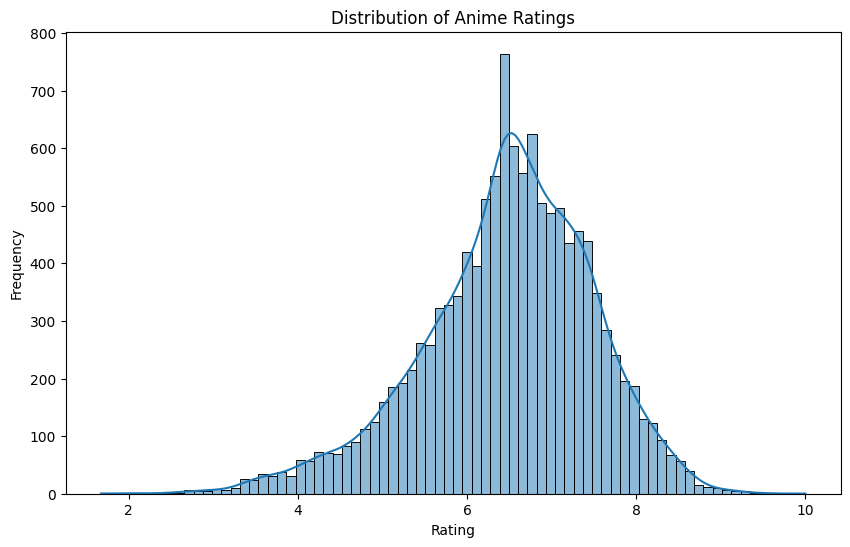

/tmp/ipython-input-1425683204.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


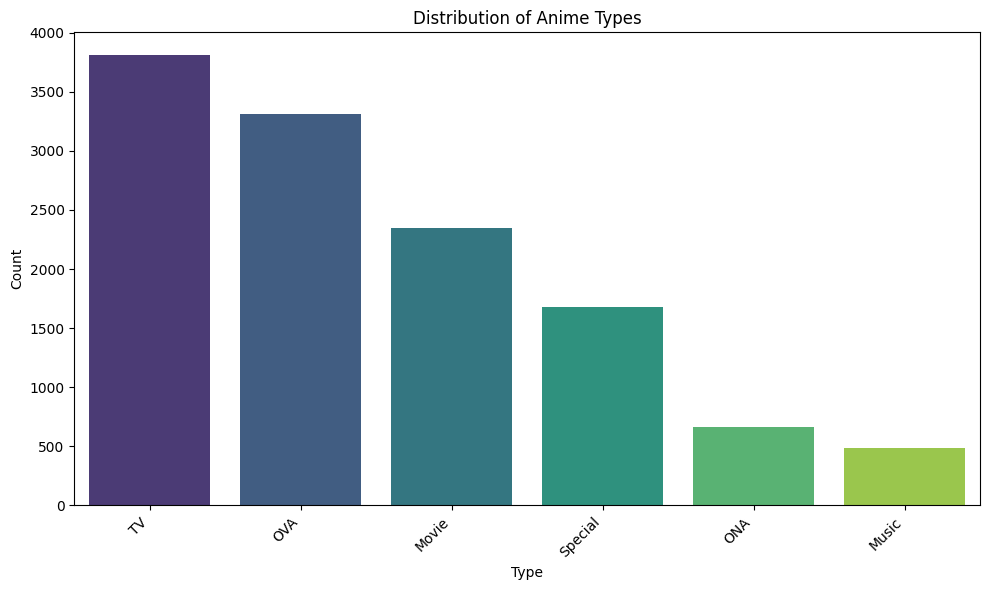

In [9]:
# Display data types
print("Data Types:")
print(df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())

# Generate descriptive statistics for categorical columns
print("\nDescriptive Statistics for Categorical Columns:")
display(df.describe(include='object'))

# Create a histogram of the 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Create a bar plot of the 'type' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Select features for similarity

### Subtask:
Decide which columns will be used to calculate similarity between anime.


## Preprocess features

### Subtask:
Convert categorical features to a suitable format and normalize numerical features.


**Reasoning**:
Create dummy variables for 'genre' and 'type', scale 'rating' and 'members', and then concatenate these processed features into a new DataFrame. Finally, drop the original 'genre', 'type', 'rating', and 'members' columns from the original DataFrame.



In [10]:
# 1. Create dummy variables for the 'genre' and 'type' columns
genre_dummies = pd.get_dummies(df['genre'])
type_dummies = pd.get_dummies(df['type'])

# 2. Concatenate the original DataFrame with the newly created dummy variables
df_processed = pd.concat([df, genre_dummies, type_dummies], axis=1)

# 3. Drop the original 'genre' and 'type' columns
df_processed = df_processed.drop(['genre', 'type'], axis=1)

# 4. Scale the 'rating' and 'members' columns using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed[['rating', 'members']] = scaler.fit_transform(df_processed[['rating', 'members']])

# 5. Concatenate the scaled numerical columns with the DataFrame containing the one-hot encoded features.
# This step is implicitly done in step 4 by scaling the columns directly in df_processed

# 6. Drop the original 'rating' and 'members' columns.
# This step is not needed as the original columns were overwritten with scaled values.

# Display the first few rows of the processed DataFrame
display(df_processed.head())

,anime_id,name,episodes,rating,members,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi",...,Supernatural,Thriller,Vampire,Yaoi,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1,2.847535,3.330241,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64,2.739380,14.148406,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,28977,Gintama°,51,2.729547,1.754713,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,9253,Steins;Gate,24,2.650889,11.957666,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,9969,Gintama&#039;,51,2.641057,2.429742,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Implement cosine similarity

### Subtask:
Create a function to compute cosine similarity between anime based on the selected features.


**Reasoning**:
Import the required function for cosine similarity calculation and define the function to compute similarity scores based on the preprocessed features.



In [11]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(df_processed, anime_index):
    """
    Calculates cosine similarity between an anime at a given index and all other anime.

    Args:
        df_processed: DataFrame containing preprocessed anime features.
        anime_index: Index of the anime for which to calculate similarity.

    Returns:
        An array of cosine similarity scores.
    """
    # Select the feature columns for similarity calculation
    # Exclude non-feature columns like 'anime_id', 'name', 'episodes'
    feature_columns = df_processed.columns.difference(['anime_id', 'name', 'episodes'])
    feature_matrix = df_processed[feature_columns]

    # Calculate cosine similarity between the specified anime and all others
    similarity_scores = cosine_similarity(feature_matrix.iloc[anime_index].values.reshape(1, -1), feature_matrix)

    return similarity_scores[0] # Return the first row of the similarity matrix

## Develop recommendation function

### Subtask:
Design a function that takes a target anime and returns a list of similar anime using the cosine similarity function.


**Reasoning**:
Define the function `get_similar_anime` that takes the processed DataFrame, target anime name, and number of recommendations as input, finds the target anime's index, calculates similarity scores using the `calculate_similarity` function, gets the indices of the top N similar anime, and returns their names.



In [12]:
def get_similar_anime(df_processed, target_anime_name, n_recommendations=10):
    """
    Recommends similar anime based on cosine similarity.

    Args:
        df_processed: DataFrame containing preprocessed anime features.
        target_anime_name: Name of the target anime (string).
        n_recommendations: Number of similar anime to recommend (integer).

    Returns:
        A list of names of similar anime.
    """
    # Find the index of the target anime
    target_anime_index = df_processed[df_processed['name'] == target_anime_name].index
    if target_anime_index.empty:
        print(f"Anime '{target_anime_name}' not found in the dataset.")
        return []

    target_anime_index = target_anime_index[0]

    # Calculate similarity scores
    similarity_scores = calculate_similarity(df_processed, target_anime_index)

    # Get indices of top N similar anime (excluding the target anime itself)
    # Use argsort to get indices that would sort the array in descending order
    # Slice to get the top N+1 indices (including the target anime)
    # Exclude the target anime index
    similar_anime_indices = similarity_scores.argsort()[::-1][1:n_recommendations + 1]

    # Get the names of the similar anime
    similar_anime_names = df_processed.iloc[similar_anime_indices]['name'].tolist()

    return similar_anime_names

# Example usage (optional, can be commented out later)
# similar_animes = get_similar_anime(df_processed, 'Steins;Gate', 5)
# print(f"Similar anime to Steins;Gate: {similar_animes}")

## Evaluate the system

### Subtask:
Split the data, calculate precision, recall, and F1-score to evaluate the recommendation system's performance.


**Reasoning**:
Split the data, create a function to generate recommendations for the test set, simulate ground truth, and implement functions to calculate precision, recall, and F1-score. Finally, calculate the average metrics.



In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
df_train, df_test = train_test_split(df_processed, test_size=0.2, random_state=42)

print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (9835, 3275)
Testing set shape: (2459, 3275)


In [15]:
def generate_recommendations_for_test(df_train, df_test, n_recommendations=10):
    """
    Generates recommendations for each anime in the test set based on the training set.

    Args:
        df_train: DataFrame containing preprocessed anime features for training.
        df_test: DataFrame containing preprocessed anime features for testing.
        n_recommendations: Number of similar anime to recommend for each test anime.

    Returns:
        A dictionary where keys are anime names from the test set and values are lists of recommended anime names.
    """
    test_recommendations = {}
    # Select the feature columns for similarity calculation
    # Exclude non-feature columns like 'anime_id', 'name', 'episodes'
    feature_columns = df_train.columns.difference(['anime_id', 'name', 'episodes'])
    feature_matrix_train = df_train[feature_columns]
    feature_matrix_test = df_test[feature_columns]

    # Calculate cosine similarity between each test anime and all training anime
    similarity_matrix = cosine_similarity(feature_matrix_test, feature_matrix_train)

    for i, test_anime_name in enumerate(df_test['name']):
        # Get the similarity scores for the current test anime
        similarity_scores = similarity_matrix[i]

        # Get indices of top N similar anime from the training set
        # Use argsort to get indices that would sort the array in descending order
        # Slice to get the top N indices
        similar_anime_indices = similarity_scores.argsort()[::-1][:n_recommendations]

        # Get the names of the similar anime from the training set
        similar_anime_names = df_train.iloc[similar_anime_indices]['name'].tolist()

        test_recommendations[test_anime_name] = similar_anime_names

    return test_recommendations

In [16]:
# Simulate ground truth for evaluation (This is a simplified simulation)
# In a real scenario, you would have actual user interaction data (e.g., watch history)
# For this example, let's assume that anime with a rating above the average rating in the training set
# are considered "relevant" for a given anime in the test set if they share genres or types.

def simulate_ground_truth(df_test, df_train, test_recommendations):
    """
    Simulates ground truth for evaluation based on shared genres and types and average rating.

    Args:
        df_test: DataFrame containing preprocessed anime features for testing.
        df_train: DataFrame containing preprocessed anime features for training.
        test_recommendations: Dictionary of recommendations for the test set.

    Returns:
        A dictionary where keys are anime names from the test set and values are lists of "relevant" anime names from the training set.
    """
    ground_truth = {}
    mean_rating_train = df_train['rating'].mean()

    # Select the genre and type columns for comparison
    genre_type_columns = [col for col in df_train.columns if col not in ['anime_id', 'name', 'episodes', 'rating', 'members']]


    for test_anime_name, recommendations in test_recommendations.items():
        ground_truth[test_anime_name] = []
        test_anime_row = df_test[df_test['name'] == test_anime_name].iloc[0]

        for recommended_anime_name in recommendations:
            recommended_anime_row = df_train[df_train['name'] == recommended_anime_name].iloc[0]

            # Check if the recommended anime has a rating above the training set mean
            is_highly_rated = recommended_anime_row['rating'] > mean_rating_train

            # Check for shared genres or types (at least one shared True value in genre/type columns)
            shared_features = (test_anime_row[genre_type_columns] & recommended_anime_row[genre_type_columns]).any()

            if is_highly_rated and shared_features:
                ground_truth[test_anime_name].append(recommended_anime_name)

    return ground_truth

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(ground_truth, test_recommendations):
    """
    Calculates precision, recall, and F1-score for the recommendations.

    Args:
        ground_truth: Dictionary of "relevant" anime for each test anime.
        test_recommendations: Dictionary of recommended anime for each test anime.

    Returns:
        A dictionary containing the average precision, recall, and F1-score.
    """
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for anime_name in ground_truth.keys():
        true_positives = len(set(ground_truth[anime_name]) & set(test_recommendations[anime_name]))
        false_positives = len(set(test_recommendations[anime_name]) - set(ground_truth[anime_name]))
        false_negatives = len(set(ground_truth[anime_name]) - set(test_recommendations[anime_name]))

        # Calculate precision
        if (true_positives + false_positives) > 0:
            precision = true_positives / (true_positives + false_positives)
            precision_scores.append(precision)

        # Calculate recall
        if (true_positives + false_negatives) > 0:
            recall = true_positives / (true_positives + false_negatives)
            recall_scores.append(recall)

        # Calculate F1-score
        if (precision + recall) > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
            f1_scores.append(f1)

    # Calculate average metrics
    avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
    avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
    avg_f1_score = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return {"precision": avg_precision, "recall": avg_recall, "f1_score": avg_f1_score}

In [18]:
# Generate recommendations for the test set
test_recommendations = generate_recommendations_for_test(df_train, df_test)

# Simulate ground truth (replace with actual ground truth if available)
ground_truth = simulate_ground_truth(df_test, df_train, test_recommendations)

# Calculate and display evaluation metrics
metrics = calculate_metrics(ground_truth, test_recommendations)
print("\nEvaluation Metrics:")
print(f"Average Precision: {metrics['precision']:.4f}")
print(f"Average Recall: {metrics['recall']:.4f}")
print(f"Average F1-score: {metrics['f1_score']:.4f}")


Evaluation Metrics:
Average Precision: 0.5551
Average Recall: 1.0000
Average F1-score: 0.5779


Difference between User-Based and Item-Based Collaborative Filtering:

User-Based Collaborative Filtering: This approach recommends items to a user based on the preferences of other users who have similar tastes. It works by finding users who are similar to the target user (e.g., they have rated similar items highly) and then recommending items that those similar users liked but the target user hasn't seen or rated yet.
Item-Based Collaborative Filtering: This approach recommends items that are similar to the items the target user has already liked or interacted with. It works by finding items that are similar to the items the target user has shown interest in (e.g., items that have been rated similarly by many users) and then recommending those similar items.
What is Collaborative Filtering and How Does It Work?

Collaborative Filtering: It is a technique used by recommendation systems to predict a user's interest in an item by collecting preferences or taste information from many users (collaborating). The basic idea is that if multiple users share similar tastes, they are likely to agree on the quality or relevance of other items.
How it Works:
Data Collection: It starts by collecting data on user preferences, which can be explicit (e.g., ratings, reviews) or implicit (e.g., purchase history, viewing time, clicks).
Similarity Calculation: The system then calculates similarity, either between users (user-based) or between items (item-based), based on the collected data.
Recommendation Generation: Finally, based on the calculated similarities, the system generates recommendations. For user-based, it recommends items liked by similar users. For item-based, it recommends items similar to those the user liked